In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mig
import numpy as np
import pathlib
np.random.seed(69)

**DEFINING CLASS**

In [2]:
PATH = './PokemonData/'
data_dir = pathlib.Path(PATH)

In [3]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES.shape

(151,)

In [4]:
IDG_train = ImageDataGenerator(rescale = 1./255,
                               validation_split=0.2)

IDG_valid = ImageDataGenerator(rescale = 1./255,
                               validation_split=0.2)

train_data = IDG_train.flow_from_directory(PATH,
                                           target_size=(299, 299),
                                           batch_size=32,
                                           classes = list(CLASS_NAMES),
                                           subset='training',
                                           shuffle=True,
                                           seed=69)

validation_data = IDG_valid.flow_from_directory(PATH,
                                                target_size=(299, 299),
                                                batch_size=32,
                                                classes = list(CLASS_NAMES),
                                                subset='validation',
                                                shuffle=False,
                                                seed=69)

Found 5542 images belonging to 151 classes.
Found 1311 images belonging to 151 classes.


In [5]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n].argmax()])
      plt.axis('off')
     

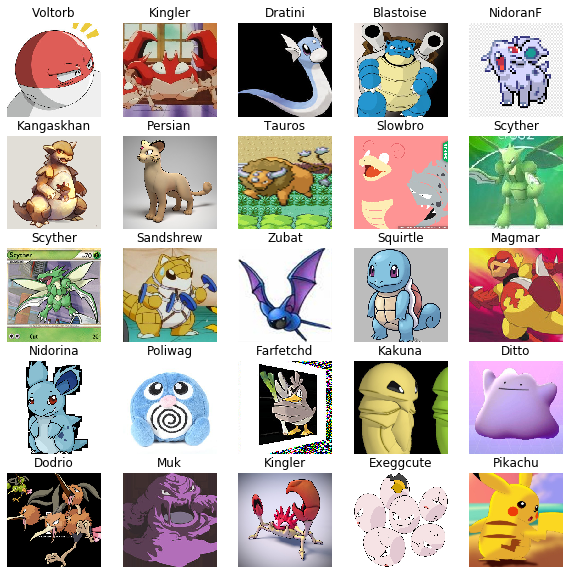

In [6]:
image_batch, label_batch = next(train_data)
show_batch(image_batch, label_batch)

In [7]:
model = Sequential()
##Convutional Layers
model.add(Conv2D(8, (4, 4),input_shape=(299,299,3)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4)))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(MaxPool2D(pool_size=(2, 2)))

##Fully Connected Layers

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(.5))
model.add(Dense(len(CLASS_NAMES),activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 8)       392       
_________________________________________________________________
activation (Activation)      (None, 296, 296, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 296, 296, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 16)      2064      
_________________________________________________________________
activation_1 (Activation)    (None, 145, 145, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 145, 145, 16)      0

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

hist = model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/50
174/174 [==============================] - 27s 155ms/step - loss: 5.0365 - accuracy: 0.0088 - val_loss: 4.9815 - val_accuracy: 0.0244
Epoch 2/50
174/174 [==============================] - 27s 155ms/step - loss: 4.5951 - accuracy: 0.0343 - val_loss: 4.6262 - val_accuracy: 0.0786
Epoch 3/50
174/174 [==============================] - 27s 156ms/step - loss: 4.0412 - accuracy: 0.0946 - val_loss: 4.2882 - val_accuracy: 0.1114
Epoch 4/50
174/174 [==============================] - 27s 155ms/step - loss: 3.5370 - accuracy: 0.1833 - val_loss: 4.0384 - val_accuracy: 0.1869
Epoch 5/50
174/174 [==============================] - 27s 156ms/step - loss: 3.1414 - accuracy: 0.2535 - val_loss: 3.8429 - val_accuracy: 0.1838
Epoch 6/50
174/174 [==============================] - 27s 154ms/step - loss: 2.8392 - accuracy: 0.3084 - val_loss: 3.7427 - val_accuracy: 0.2082
Epoch 7/50
174/174 [==============================] - 27s 154ms/step - loss: 2.5517 - accuracy: 0.3652 - val_loss: 3.4863 - val_ac

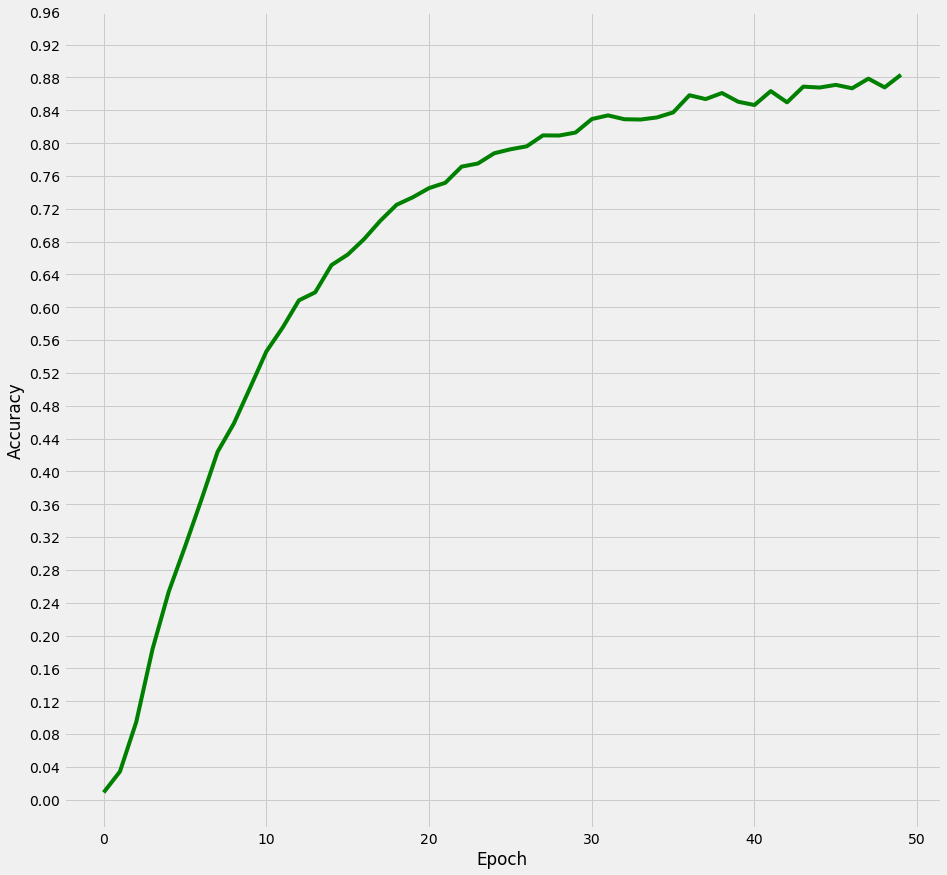

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.plot(hist.history['accuracy'],label='accuracy',color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

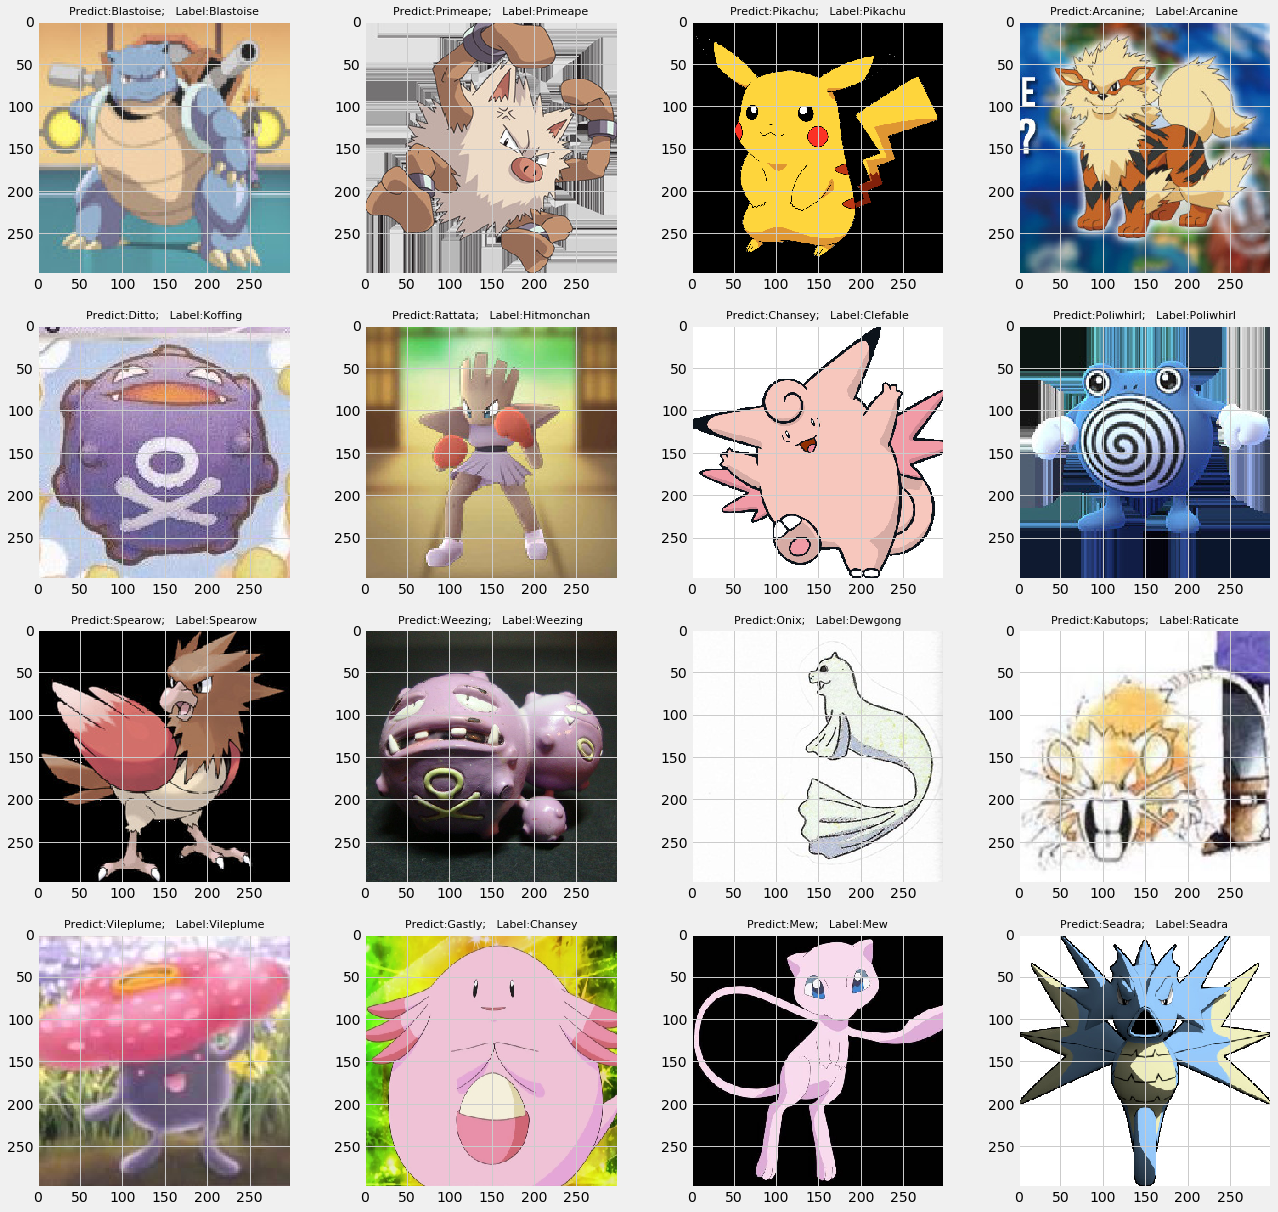

In [11]:
plt.figure(figsize=(20,20))
sam_x = []
sam_y = []
for i in np.random.choice(len(validation_data), size=16, replace=False):
    x, y = validation_data[i]
    sam_x.append(x[0])
    sam_y.append(y[0])
sam_x = np.array(sam_x)
pred_ = model.predict(sam_x)
for i in range(16):
    pred,y = pred_[i].argmax(), sam_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predict:' + str(CLASS_NAMES[pred])+ ';   Label:' + str(CLASS_NAMES[y])
    plt.title(title_,size=11)
plt.show()

In [14]:
y_true = validation_data.labels
y_pred = model.predict(validation_data).argmax(axis=1)
c = confusion_matrix(y_true, y_pred)

Text(0.5, 1.0, 'Confusion matrix')

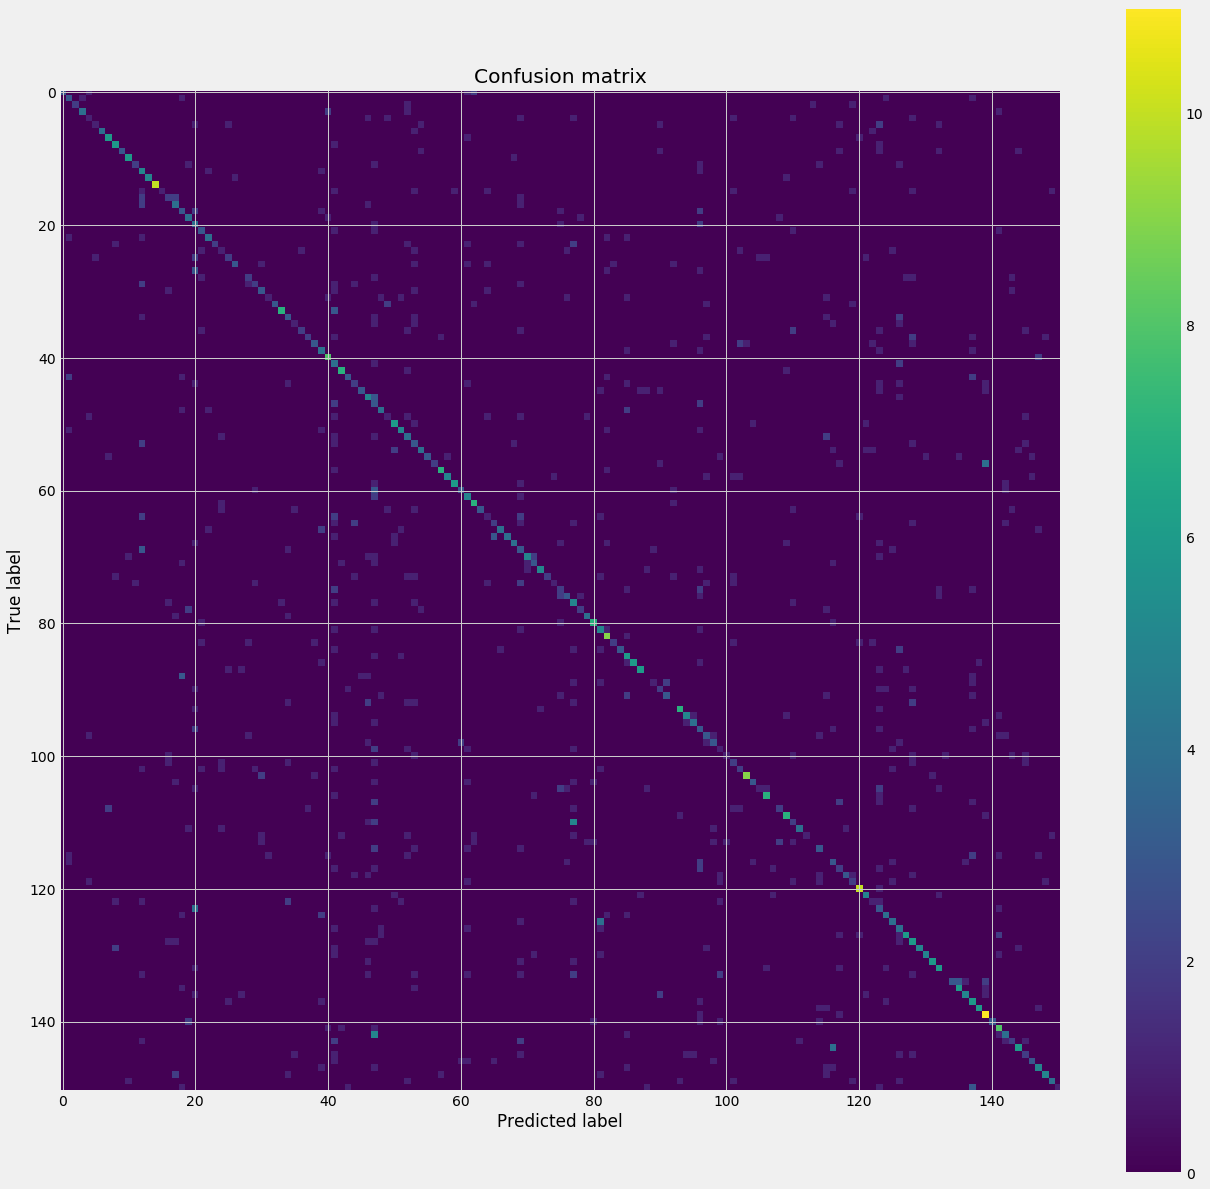

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(c)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

Text(0.5, 0, 'Fraction correctly labeled')

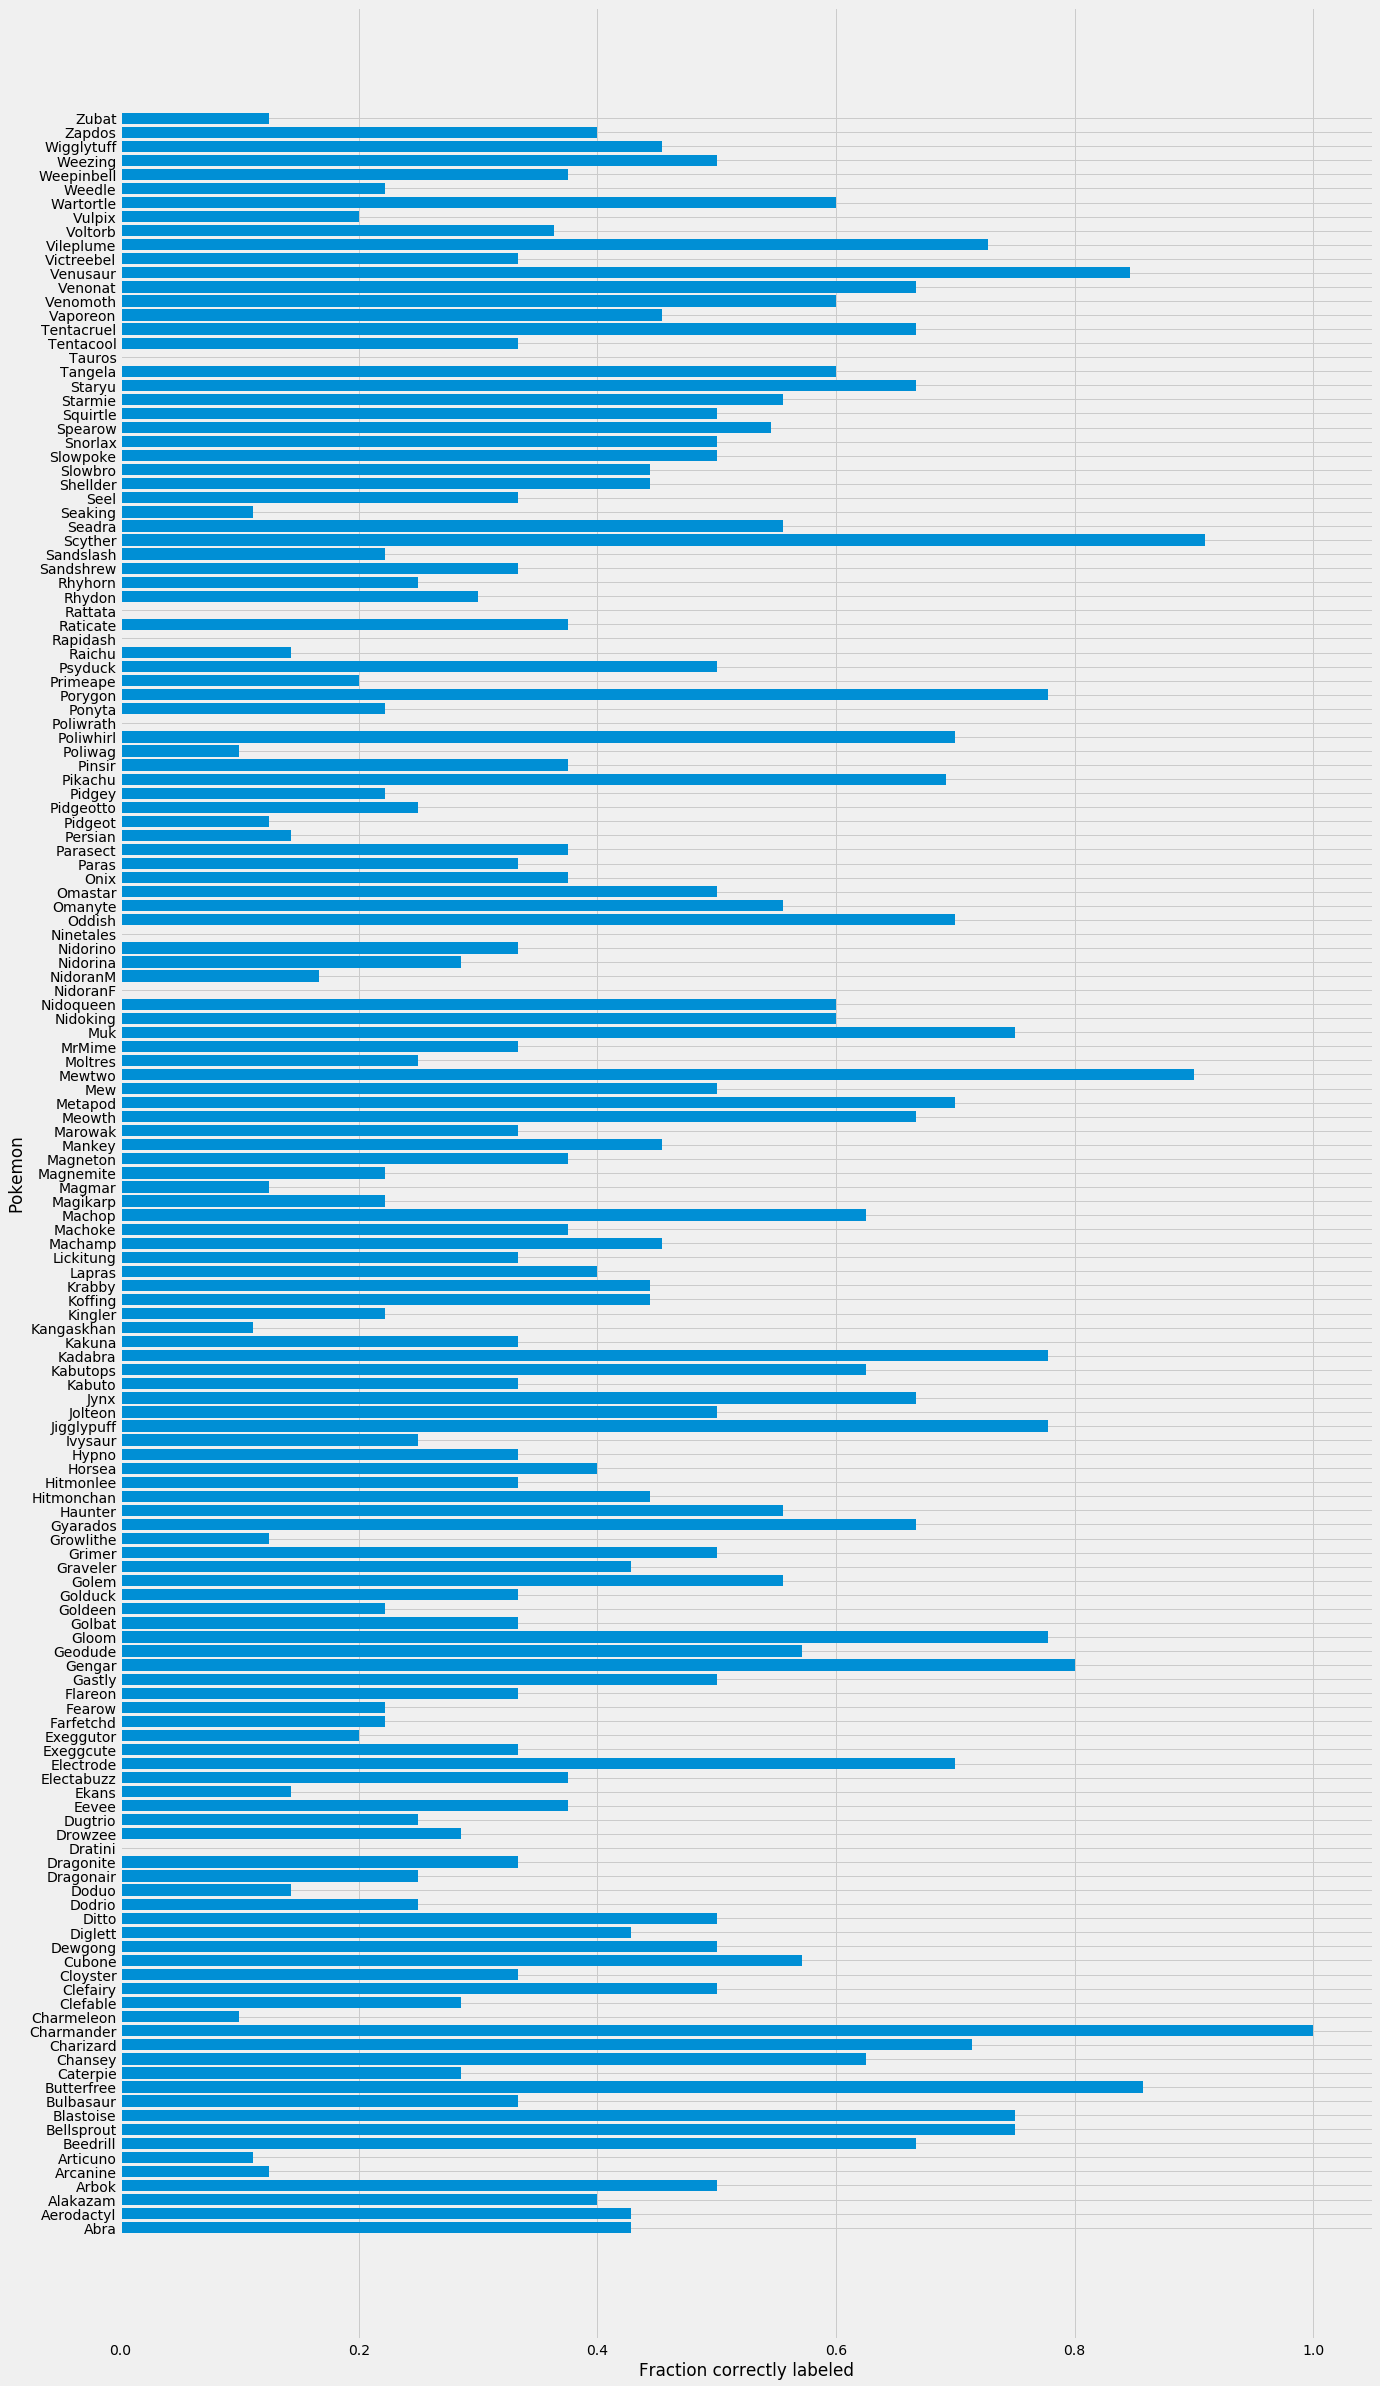

In [16]:
plt.figure(figsize=(20,40))
plt.barh(CLASS_NAMES, c.diagonal() / c.sum(axis=1))
plt.ylabel('Pokemon')
plt.xlabel('Fraction correctly labeled')